BASİT BİR KARAR AĞACI ÖRNEĞİ

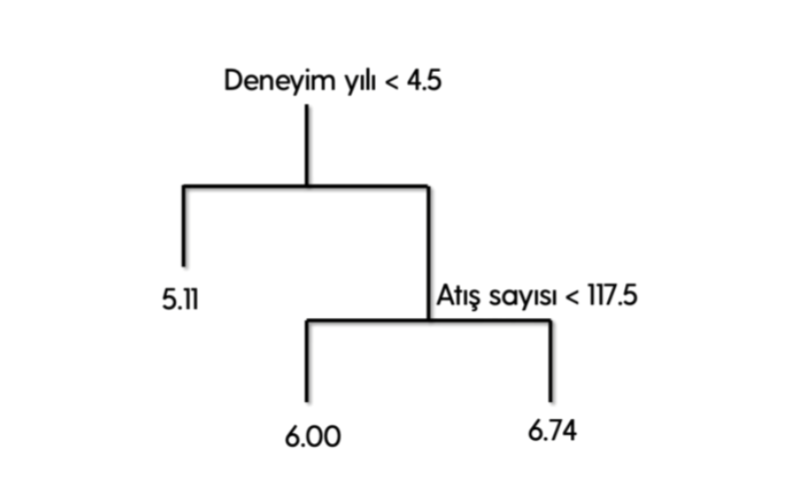

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor


from warnings import filterwarnings
filterwarnings("ignore")

df = pd.read_csv("/content/Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X  = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [14]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

# İki değişkenle basit bir deneme yapalım

Text(0, 0.5, 'Salary')

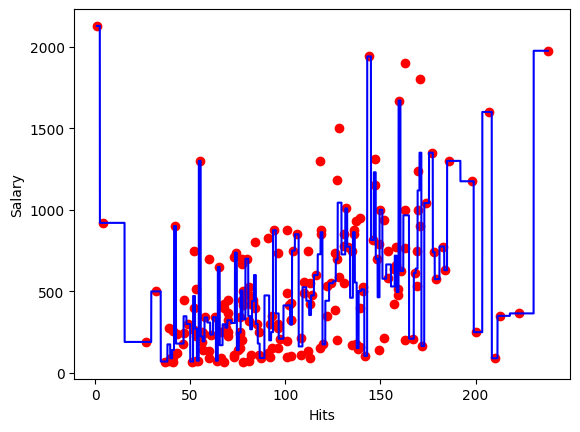

In [15]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color="red")

plt.plot(X_grid, cart_model.predict(X_grid), c="b")

plt.xlabel("Hits")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

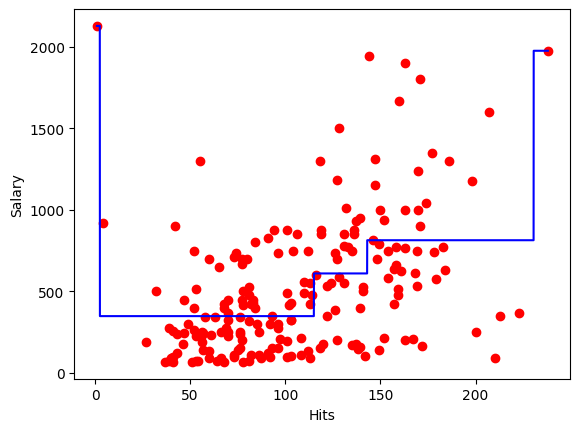

In [16]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=5).fit(X_train, y_train)


X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color="red")

plt.plot(X_grid, cart_model.predict(X_grid), c="b")

plt.xlabel("Hits")
plt.ylabel("Salary")

In [17]:
# Tüm değişkenleri kullanalım
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

y_pred=cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_pred, y_test))

463.86016256644274

In [18]:
#Model Tunning

?cart_model

In [ ]:
cart_params = {"max_depth":[2,3,4,5,10,20], "min_samples_split":[2,10,5,30,50,10]}
cart_model = DecisionTreeRegressor()
cart_cv = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)


cart_cv.best_params_




In [ ]:
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=50).fit(X_train, y_train)
np.sqrt(mean_squared_error(y_test, cart_tuned.predict(y_pred, y_test)))